Import necessary libraries and data.

In [122]:
### Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### ML packages
# %pip install umap-learn --quiet
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import umap
from sklearn.decomposition import FastICA, NMF, KernelPCA, PCA
from sklearn.manifold import TSNE

In [123]:
df = pd.read_csv('authors.csv').rename(columns = {'Unnamed: 0': 'Author'})
df = df.drop('BookID',axis=1)
X = df.copy().drop(['Author'], axis=1)
authors = df['Author'].values  # n_samples-length array

### K-Means Clustering & K-Means Clustering ++

In [124]:
X = X.to_numpy() # change pd.DataFrame to np.ndarray

K-means ++ below.

In [125]:
k = 4 
# number of clusters (assuming we know this - distinct authors = 4)
# we can hyperparameter tune if unknown (in real setting)
# will do validation later in repository

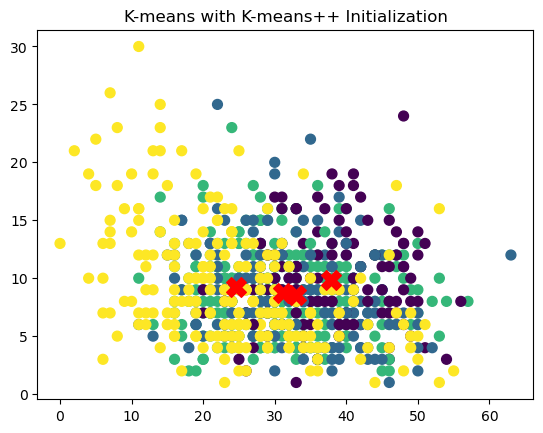

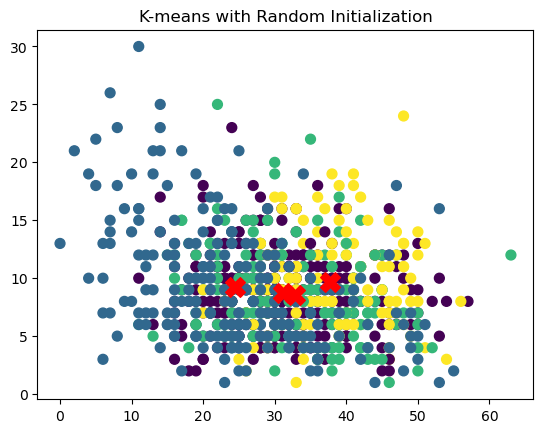

In [126]:
# K-means++ initialization 
kmeans_pp = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans_pp.fit(X)
y_kmeans_pp = kmeans_pp.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_pp, s=50, cmap='viridis')
centers_pp = kmeans_pp.cluster_centers_
plt.scatter(centers_pp[:, 0], centers_pp[:, 1], c='red', s=200, marker='X')
plt.title('K-means with K-means++ Initialization')
plt.show()

# K-means w/ random initialization
kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis') # plot
centers = kmeans.cluster_centers_ # centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X') # plot centroids
plt.title('K-means with Random Initialization')
plt.show()

The results are poor, clearly some type of dimensionality reduction should be applied before running k-means++.  Lets apply UMAP and rerun K-means++.

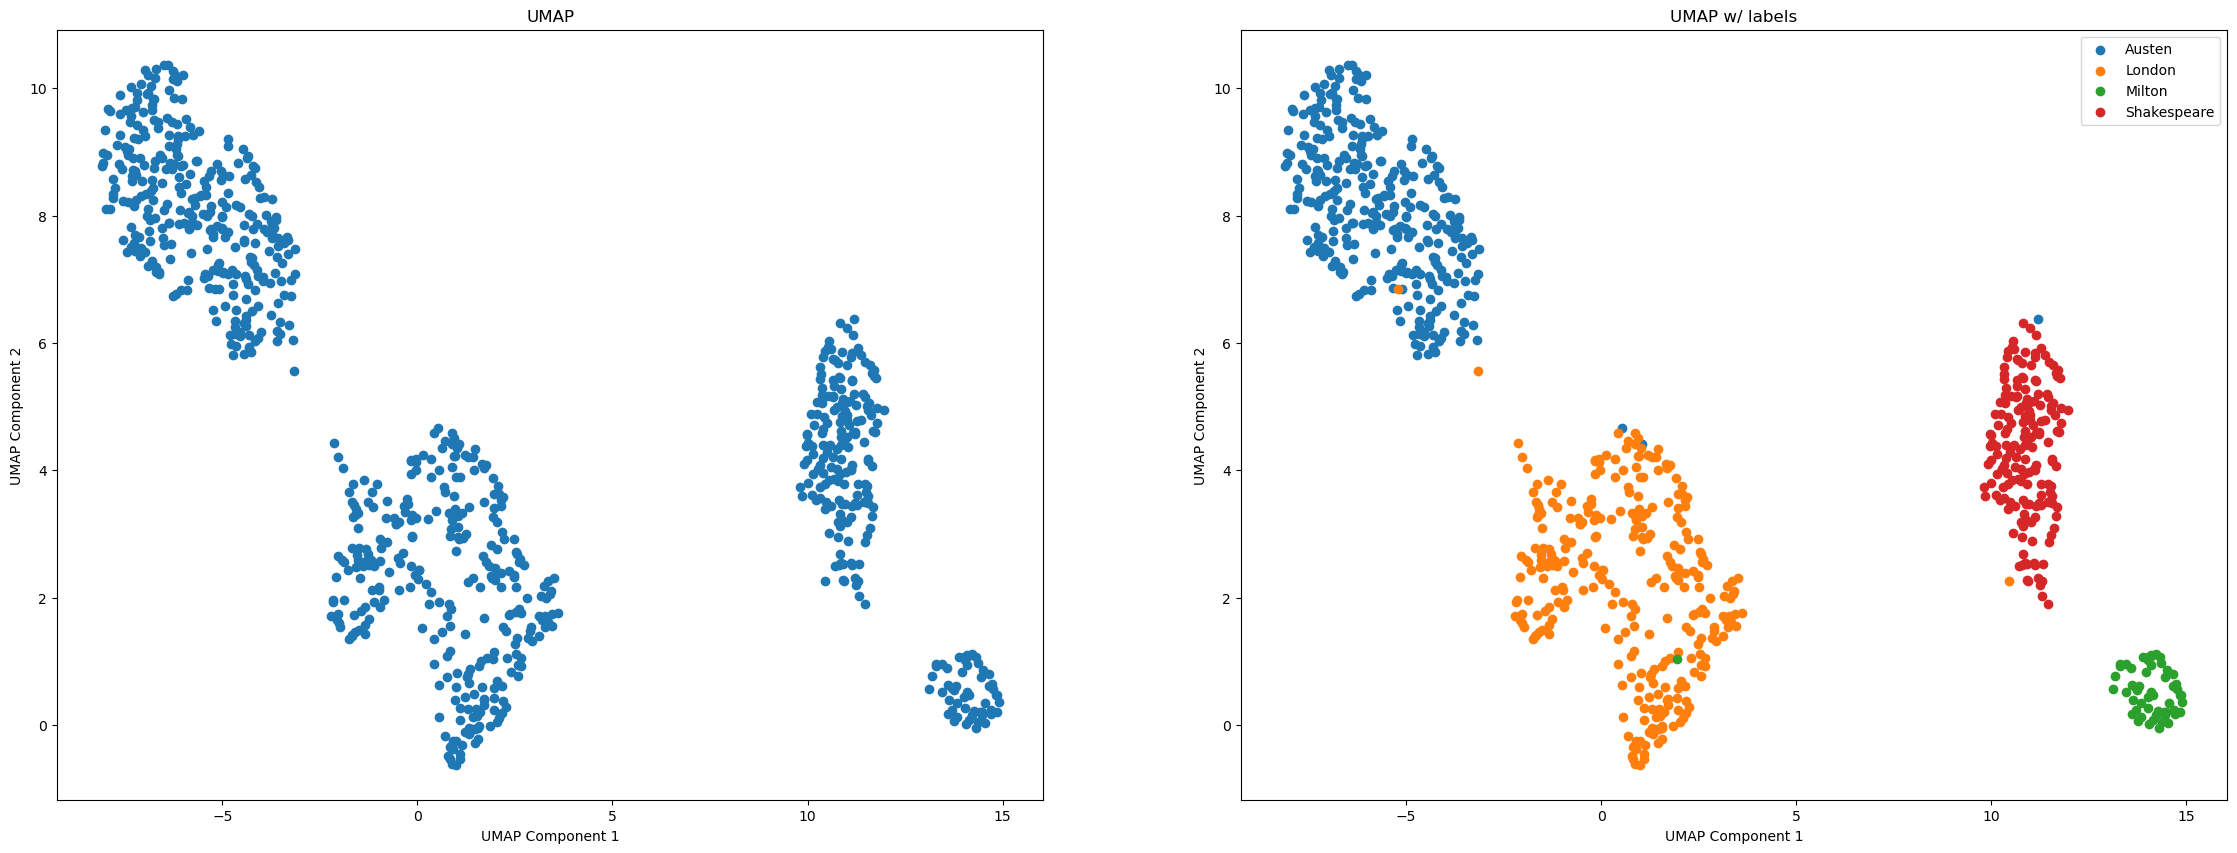

In [127]:
### UMAP
random_state=None
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.3, n_jobs=-1)
X_umap = umap_model.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(28, 10))


axes[0].scatter(X_umap[:,0],X_umap[:,1])
axes[0].set_xlabel("UMAP Component 1")
axes[0].set_ylabel("UMAP Component 2")
axes[0].set_title("UMAP")

for author in ['Austen', 'London', 'Milton', 'Shakespeare']:
    mask = (authors == author)
    axes[1].scatter(X_umap[mask, 0], X_umap[mask, 1], label=author)
axes[1].legend(loc="upper right")
axes[1].set_xlabel("UMAP Component 1")
axes[1].set_ylabel("UMAP Component 2")
axes[1].set_title("UMAP w/ labels");


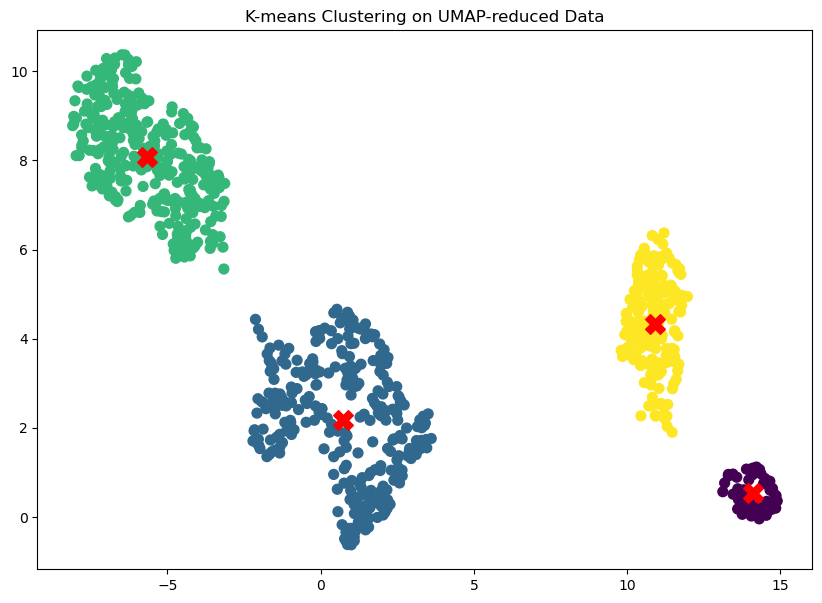

In [128]:
# Run K-means++ on UMAP-reduced data
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans.fit(X_umap)

y_kmeans = kmeans.predict(X_umap) # Predict clusters

plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')  # Plot centroids
plt.title('K-means Clustering on UMAP-reduced Data')
plt.show()

This is looking a lot better! Now, assuming we didnt have the author labels, we could pull out the labels from the K-means++ and inspect which chapters correspond to which cluster!

In [135]:
labels = kmeans.labels_
labels_df = pd.DataFrame(labels).reset_index(drop=False).rename(columns = {'index':'Chapters', 0:'Cluster/Author'})
labels_df

,Chapters,Cluster/Author
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
836,836,3
837,837,3
838,838,3
839,839,3
